In [3]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [6]:
def img(i):
    plt.imshow(X_train[i], cmap = 'binary')
    plt.title(y_train[i])
    plt.show()

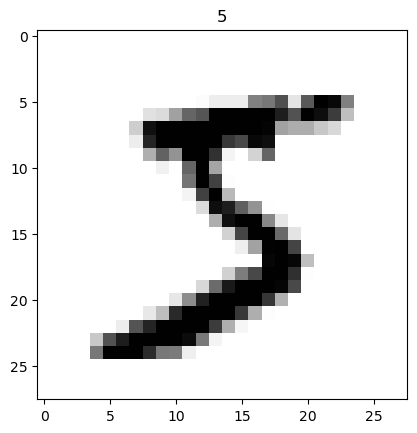

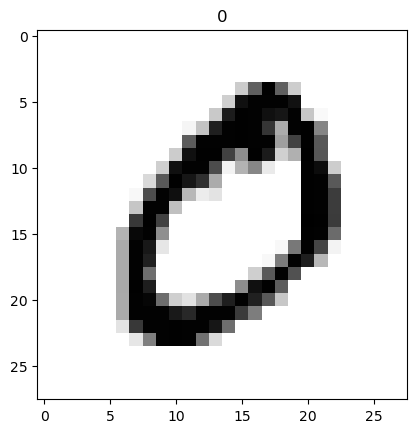

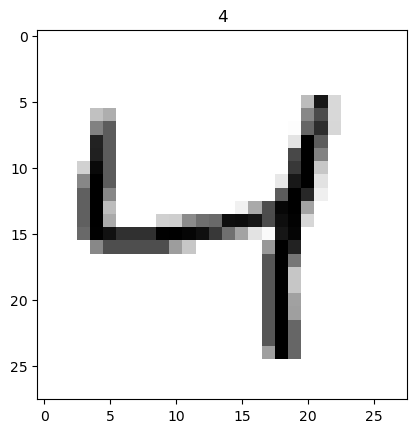

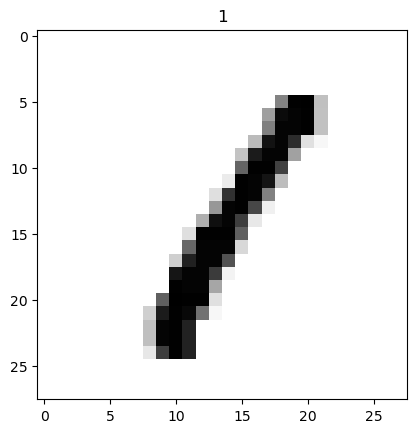

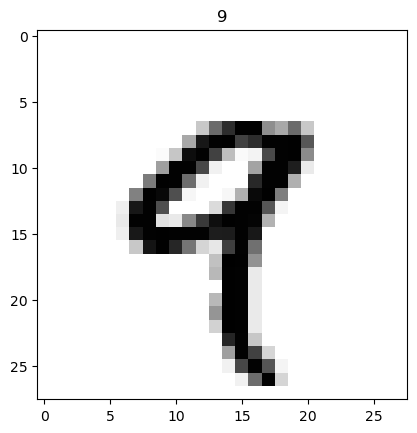

In [7]:
for i in range(5):
    img(i)

Normalize the image to [0, 1] range

In [10]:
X_train = X_train.astype(np.float32)/255
X_test = X_test.astype(np.float32)/255

Reshape / expand the dimension of images to (28, 28, 1)

In [11]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [12]:
X_train.shape

(60000, 28, 28, 1)

In [13]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [14]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape = (28, 28, 1), activation = 'relu'))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(10, activation = 'softmax'))

C:\Users\sidal\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                    │ (None, 26, 26, 32)            │         320 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ max_pooling2d (MaxPooling2D)       │ (None, 13, 13, 32)            │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ flatten (Flatten)                  │ (None, 5408)                  │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dropout (Dropout)                  │ (None, 5408)                  │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense (Dense)                      │ (None, 10)                    │      54,090 │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 54,410 (212.54 KB)

 Trainable params: 54,410 (212.54 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(optimizer = 'adam', loss = keras.losses.categorical_crossentropy, metrics=['accuracy'])

Callbacks

In [24]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
#early stopping
es = EarlyStopping(monitor = 'val_acc', min_delta = 0.01, patience = 4, verbose = 1)
#model checkpoint
mc = ModelCheckpoint("./bestmodel.h5", monitor = 'val_acc', verbose = 1, save_best_only = True)
cb = [es, mc]

ValueError: The filepath provided must end in `.keras` (Keras model format). Received: filepath=./bestmodel.h5

Model Training

In [25]:
his = model.fit(X_train, y_train, epochs = 5, validation_split = 0.3, callbacks = cb)

NameError: name 'cb' is not defined